In [ ]:
import sys
import pandas as pd
import numpy as np

# 경로 설정
DATA_PATH = "dataset/"

## 데이터 확인

In [3]:
# 파일 경로 설정
train_file = DATA_PATH + 'u1.base'
genre_file = DATA_PATH + 'u.genre'
movie_info_file = DATA_PATH + 'u.item'
occupation_file = DATA_PATH + 'u.occupation'
user_info_file = DATA_PATH + 'u.user'

print(f"Loading data... Train: {train_file}")

# 데이터 로드
# 제공된 포맷: user_id, item_id, rating, time_stamp (탭 구분)
columns = ['user_id', 'item_id', 'rating', 'time_stamp']

try:
    train_df = pd.read_csv(train_file, sep='\t', names=columns, encoding='latin-1')
except Exception as e:
    print(f"Error loading files: {e}")
    sys.exit(1)

# 훈련, 테스트 데이터 확인
print("------ Training data info ------")
print(f"Training data shape: {train_df.shape}")
print(f"Training data sample:\n{train_df.head()}")

# 장르 데이터 로드
genre_columns = ['genre', 'genre_id']
try:
    genre_df = pd.read_csv(genre_file, sep='|', names=genre_columns, encoding='latin-1')
except Exception as e:
    print(f"Error loading genre file: {e}")
    sys.exit(1)
print("------ genre data info ------")
print(f"Genre data shape: {genre_df.shape}")

genre_map = dict(zip(genre_df['genre_id'], genre_df['genre']))
print(f"Genre mapping: {genre_map}")

# 영화 데이터 로드
movie_columns = ['item_id', 'title', 'release_date', 'video_release_date', 'IMDb_URL'] + [genre for genre in genre_map.values()]

try:
    movie_df = pd.read_csv(movie_info_file, sep='|', names=movie_columns, encoding='latin-1')
except Exception as e:
    print(f"Error loading movie info file: {e}")
    sys.exit(1)

print("------ Movie data info ------")
print(f"Movie data shape: {movie_df.shape}")
print(f"Movie data sample:\n{movie_df.head()}")

# 직업 데이터 로드
occupation_columns = ['occupation']

try:
    occupation_df = pd.read_csv(occupation_file, sep='|', names=occupation_columns, encoding='latin-1')
except Exception as e:
    print(f"Error loading occupation file: {e}")
    sys.exit(1)

print("------ Occupation data info ------")
print(f"Occupation data shape: {occupation_df.shape}")
print(f"Occupation data sample:\n{occupation_df.head()}")

# 사용자 데이터 로드
user_columns = ['user_id', 'age', 'gender', 'occupation', 'zip_code']

try:
    user_df = pd.read_csv(user_info_file, sep='|', names=user_columns, encoding='latin-1')
except Exception as e:
    print(f"Error loading user info file: {e}")
    sys.exit(1)

print("------ User data info ------")
print(f"User data shape: {user_df.shape}")
print(f"User data sample:\n{user_df.head()}")

Loading data... Train: dataset/u1.base
------ Training data info ------
Training data shape: (80000, 4)
Training data sample:
   user_id  item_id  rating  time_stamp
0        1        1       5   874965758
1        1        2       3   876893171
2        1        3       4   878542960
3        1        4       3   876893119
4        1        5       3   889751712
------ genre data info ------
Genre data shape: (19, 2)
Genre mapping: {0: 'unknown', 1: 'Action', 2: 'Adventure', 3: 'Animation', 4: "Children's", 5: 'Comedy', 6: 'Crime', 7: 'Documentary', 8: 'Drama', 9: 'Fantasy', 10: 'Film-Noir', 11: 'Horror', 12: 'Musical', 13: 'Mystery', 14: 'Romance', 15: 'Sci-Fi', 16: 'Thriller', 17: 'War', 18: 'Western'}
------ Movie data info ------
Movie data shape: (1682, 24)
Movie data sample:
   item_id              title release_date  video_release_date  \
0        1   Toy Story (1995)  01-Jan-1995                 NaN   
1        2   GoldenEye (1995)  01-Jan-1995                 NaN   
2        

## 상관관계 분석

In [4]:
# 훈련 데이터와 테스트 데이터에 피처 통합

# 장르 벡터 생성 및 추가
movie_genres = movie_df.set_index('item_id')[list(genre_map.values())]
train_df['genre_vec'] = [v for v in movie_genres.loc[train_df['item_id']].values]

# 출시일 피처 추가
movie_release_date = movie_df.set_index('item_id')['release_date']
train_df['release_date'] = train_df['item_id'].map(movie_release_date)

# 나이 피처 추가
user_age = user_df.set_index('user_id')['age']
train_df['age'] = train_df['user_id'].map(user_age)

# 성별 피처 추가
user_gender = user_df.set_index('user_id')['gender']
train_df['gender'] = train_df['user_id'].map(user_gender)

# 직업 피처 추가
user_occupation = user_df.set_index('user_id')['occupation']
train_df['occupation'] = train_df['user_id'].map(user_occupation)

# 데이터 확인
print("------ Integrated Training data info ------")
print(f"Training data shape: {train_df.shape}")
print("Training data sample:\n")
train_df.head()

------ Integrated Training data info ------
Training data shape: (80000, 9)
Training data sample:



,user_id,item_id,rating,time_stamp,genre_vec,release_date,age,gender,occupation
0,1,1,5,874965758,"[0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",01-Jan-1995,24,M,technician
1,1,2,3,876893171,"[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",01-Jan-1995,24,M,technician
2,1,3,4,878542960,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",01-Jan-1995,24,M,technician
3,1,4,3,876893119,"[0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",01-Jan-1995,24,M,technician
4,1,5,3,889751712,"[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...",01-Jan-1995,24,M,technician


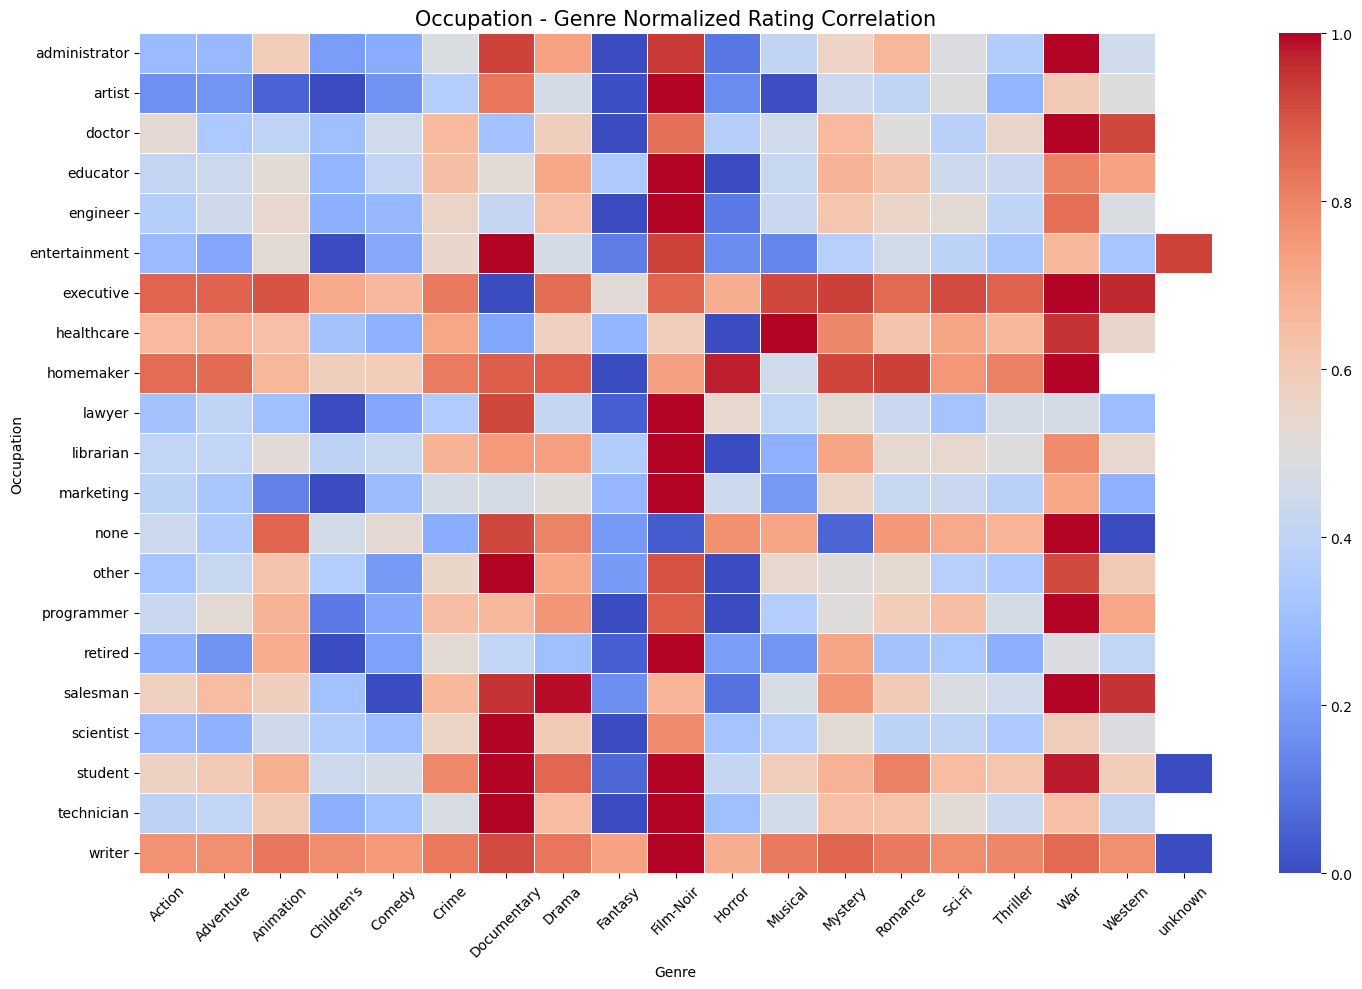

In [5]:
# 피처 별 상관관계 분석
import matplotlib.pyplot as plt
import seaborn as sns

# 직업에 따른 장르 별 평점에 대한 상관관계 분석
occupation_genre_rating = {}
for occupation in occupation_df['occupation']:
    occupation_data = train_df[train_df['occupation'] == occupation]
    if occupation_data.empty:
        continue
    genre_rating = {}
    for genre_id, genre_name in genre_map.items():
        genre_indices = movie_df[movie_df[genre_name] == 1]['item_id']
        genre_ratings = occupation_data[occupation_data['item_id'].isin(genre_indices)]['rating']
        if not genre_ratings.empty:
            genre_rating[genre_name] = genre_ratings.mean()
    occupation_genre_rating[occupation] = genre_rating

# 상관관계 정규화
for occupation in occupation_genre_rating:
    ratings = occupation_genre_rating[occupation]
    max_rating = max(ratings.values())
    min_rating = min(ratings.values())
    for genre in ratings:
        if max_rating - min_rating > 0:
            ratings[genre] = (ratings[genre] - min_rating) / (max_rating - min_rating)
        else:
            ratings[genre] = 0.0

# 관계성 시각화
# 딕셔너리를 데이터프레임으로 변환
# 행: Occupation, 열: Genre
df_heatmap = pd.DataFrame(occupation_genre_rating).T 

# 히트맵 그리기
plt.figure(figsize=(15, 10)) # 화면 크기 설정
sns.heatmap(df_heatmap, 
            annot=False,    # 칸 안에 숫자 표시 여부 (너무 복잡하면 False)
            cmap= 'coolwarm', # 색상맵 설정
            linewidths=.5)  # 칸 사이 간격

plt.title('Occupation - Genre Normalized Rating Correlation', fontsize=15)
plt.ylabel('Occupation')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

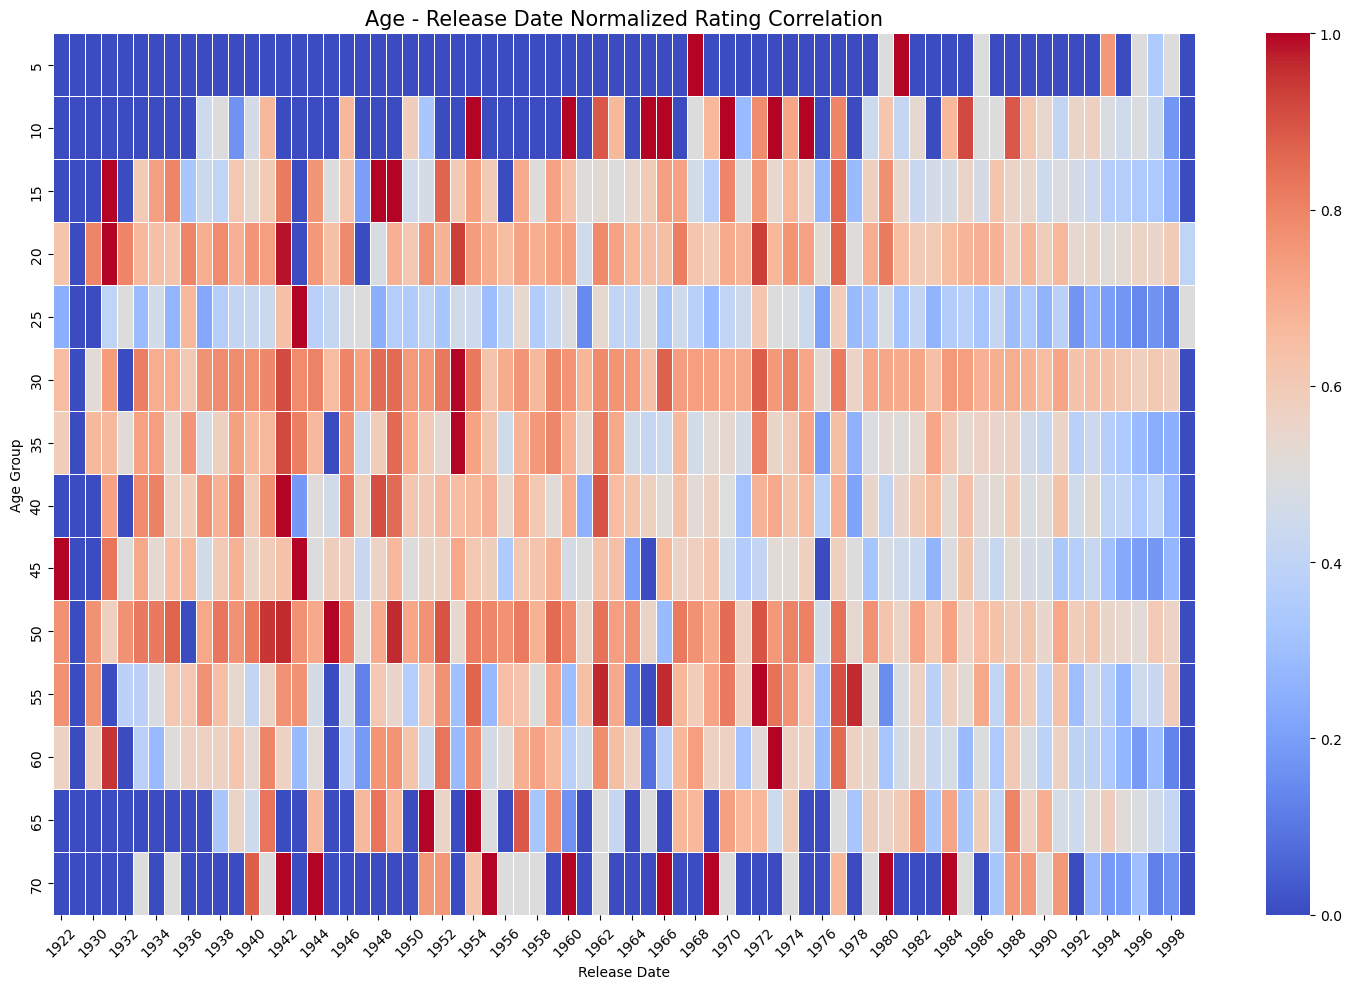

In [6]:
# 나이 별 출시일에 따른 평점 상관관계 분석

# 5세 단위로 데이터 통합
bins = range(0, 101, 5)  # 0, 5, 10, ... 100
group_labels = [i for i in range(0, 100, 5)] # '0-4', '5-9', '10-14'...

train_df['age_group'] = pd.cut(train_df['age'], bins=bins, labels=group_labels, right=False)

age_release_rating = {}

# 5세 단위 그룹별로 반복
for group in sorted(train_df['age_group'].unique().dropna()):
    # 해당 나이대(예: 20-24)의 데이터만 추출
    group_data = train_df[train_df['age_group'] == group]
    
    if group_data.empty:
        continue

    # (이전과 동일) 출시 연도별 평점 평균 계산
    release_rating = {}
    
    # 여기서 'release_date'를 연도(Year)로 변환해서 묶는 것이 좋습니다.
    # (이미 데이터에 4자리 연도만 추출해서 쓰고 계신다면 그대로 쓰셔도 됩니다)
    # 아래는 release_date 문자열에서 연도만 뽑아서 쓰는 로직 포함입니다.
    temp_df = group_data.copy()
    
    # release_date에서 연도 추출 (예: '01-Jan-1995' -> '1995')
    temp_df['release_year'] = temp_df['release_date'].astype(str).str[-4:]
    
    # 연도별 평균
    year_means = temp_df.groupby('release_year')['rating'].mean()
    age_release_rating[group] = year_means.to_dict()
    
# 같은 연도 데이터 통합
for age in age_release_rating:
    release_rating = age_release_rating[age]
    consolidated_rating = {}
    for release_date in release_rating:
        year = release_date[-4:]  # 연도 추출
        if year in consolidated_rating:
            consolidated_rating[year].append(release_rating[release_date])
        else:
            consolidated_rating[year] = [release_rating[release_date]]
    # 평균 계산
    for year in consolidated_rating:
        consolidated_rating[year] = np.mean(consolidated_rating[year])
    age_release_rating[age] = consolidated_rating

# 상관관계 정규화
for group in age_release_rating:
    ratings = age_release_rating[group]
    if not ratings: continue
        
    max_rating = max(ratings.values())
    min_rating = min(ratings.values())
    
    for year in ratings:
        if max_rating - min_rating > 0:
            ratings[year] = (ratings[year] - min_rating) / (max_rating - min_rating)
        else:
            ratings[year] = 0.5 # 최대최소 같으면 중간값

# 관계성 시각화
# 딕셔너리를 데이터프레임으로 변환
# 행: Age Group, 열: Release Date
df_heatmap = pd.DataFrame(age_release_rating).T

# 정렬
df_heatmap = df_heatmap.sort_index(axis=0)
df_heatmap = df_heatmap.sort_index(axis=1)

# 히트맵 그리기
plt.figure(figsize=(15, 10)) # 화면 크기 설정
sns.heatmap(df_heatmap.fillna(0), 
            annot=False,    # 칸 안에 숫자 표시 여부 (너무 복잡하면 False)
            cmap= 'coolwarm', # 색상맵 설정
            linewidths=.5
            )  # 칸 사이 간격
plt.title('Age - Release Date Normalized Rating Correlation', fontsize=15)
plt.ylabel('Age Group')
plt.xlabel('Release Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

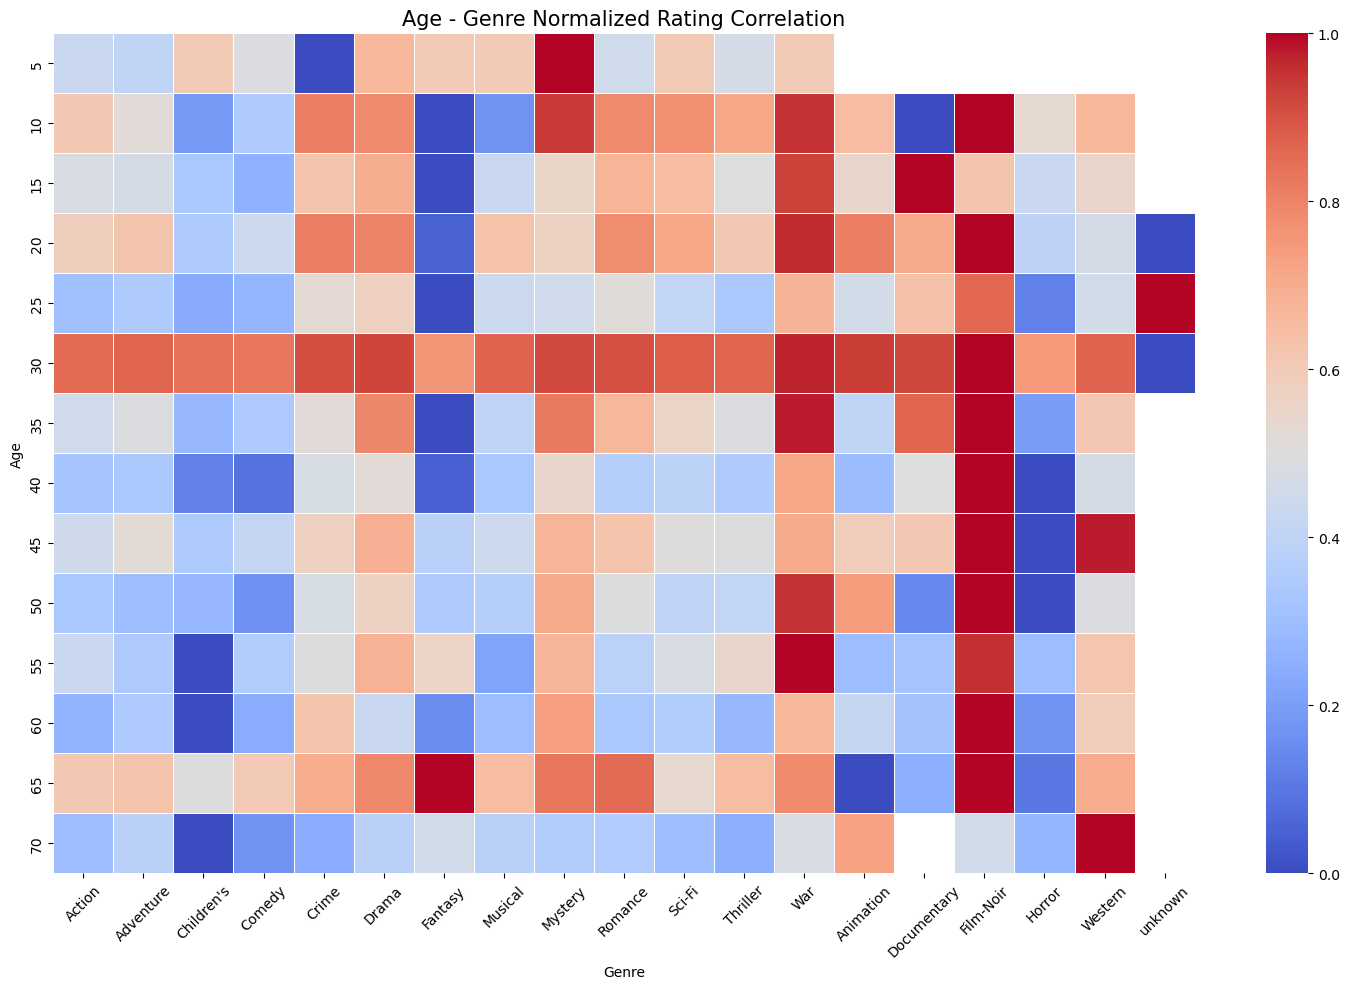

In [7]:
# 나이 별 장르에 따른 평점 상관관계 분석
age_genre_rating = {}
for group in sorted(train_df['age_group'].unique()):
    age_data = train_df[train_df['age_group'] == group]
    if age_data.empty:
        continue
    genre_rating = {}
    for genre_id, genre_name in genre_map.items():
        genre_indices = movie_df[movie_df[genre_name] == 1]['item_id']
        genre_ratings = age_data[age_data['item_id'].isin(genre_indices)]['rating']
        if not genre_ratings.empty:
            genre_rating[genre_name] = genre_ratings.mean()
    age_genre_rating[group] = genre_rating
    
# 상관관계 정규화
for age in age_genre_rating:
    ratings = age_genre_rating[age]
    max_rating = max(ratings.values())
    min_rating = min(ratings.values())
    for genre in ratings:
        if max_rating - min_rating > 0:
            ratings[genre] = (ratings[genre] - min_rating) / (max_rating - min_rating)
        else:
            ratings[genre] = 0.0

# 관계성 시각화
# 딕셔너리를 데이터프레임으로 변환
# 행: Age, 열: Genre
df_heatmap = pd.DataFrame(age_genre_rating).T

# 히트맵 그리기
plt.figure(figsize=(15, 10)) # 화면 크기 설정
sns.heatmap(df_heatmap, 
            annot=False,    # 칸 안에 숫자 표시 여부 (너무 복잡하면 False)
            cmap= 'coolwarm', # 색상맵 설정
            linewidths=.5)  # 칸 사이 간격
plt.title('Age - Genre Normalized Rating Correlation', fontsize=15)
plt.ylabel('Age')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

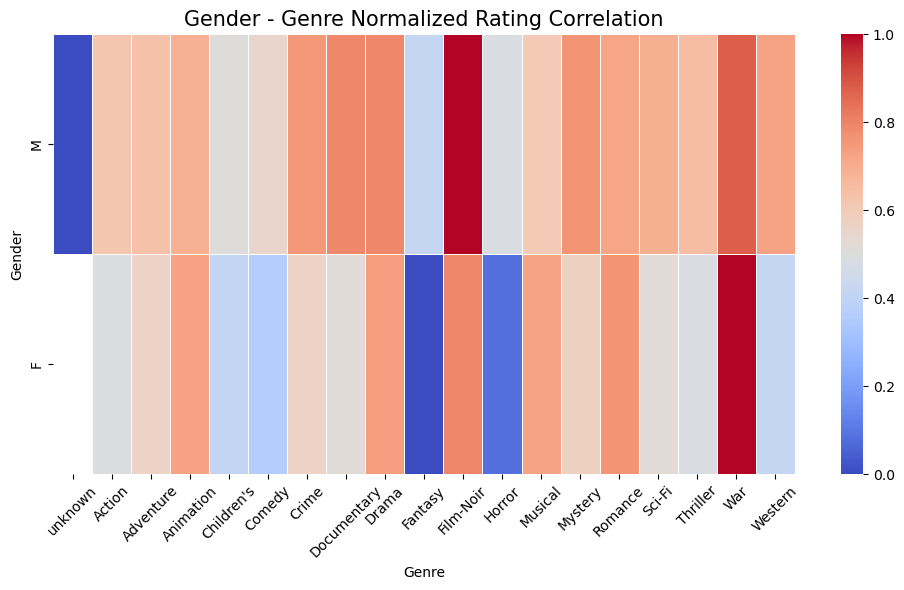

In [8]:
# 성별에 따른 장르 별 평점에 대한 상관관계 분석
gender_genre_rating = {}
for gender in train_df['gender'].unique():
    gender_data = train_df[train_df['gender'] == gender]
    if gender_data.empty:
        continue
    genre_rating = {}
    for genre_id, genre_name in genre_map.items():
        genre_indices = movie_df[movie_df[genre_name] == 1]['item_id']
        genre_ratings = gender_data[gender_data['item_id'].isin(genre_indices)]['rating']
        if not genre_ratings.empty:
            genre_rating[genre_name] = genre_ratings.mean()
    gender_genre_rating[gender] = genre_rating

# 상관관계 정규화
for gender in gender_genre_rating:
    ratings = gender_genre_rating[gender]
    max_rating = max(ratings.values())
    min_rating = min(ratings.values())
    for genre in ratings:
        if max_rating - min_rating > 0:
            ratings[genre] = (ratings[genre] - min_rating) / (max_rating - min_rating)
        else:
            ratings[genre] = 0.0

# 관계성 시각화
# 딕셔너리를 데이터프레임으로 변환
# 행: Gender, 열: Genre
df_heatmap = pd.DataFrame(gender_genre_rating).T

# 히트맵 그리기
plt.figure(figsize=(10, 6)) # 화면 크기 설정
sns.heatmap(df_heatmap, 
            annot=False,    # 칸 안에 숫자 표시 여부 (너무 복잡하면 False)
            cmap= 'coolwarm', # 색상맵 설정
            linewidths=.5)  # 칸 사이 간격
plt.title('Gender - Genre Normalized Rating Correlation', fontsize=15)
plt.ylabel('Gender')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()